<a href="https://colab.research.google.com/github/SushantSaykad/dlcodes/blob/main/LP3Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [11]:
df = pd.read_csv("uber.csv") 


In [12]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...,...
26777,48842341,2013-10-18 01:54:00.0000004,24.5,2013-10-18 01:54:00 UTC,-73.987893,40.744102,-73.981747,40.666842,1.0
26778,23885183,2011-09-26 07:56:59.0000001,6.5,2011-09-26 07:56:59 UTC,-73.992994,40.742853,-73.973609,40.738749,1.0
26779,39750186,2009-04-21 08:31:00.00000025,8.9,2009-04-21 08:31:00 UTC,-73.982207,40.770703,-74.003693,40.743873,5.0
26780,13899259,2015-04-22 00:33:27.0000002,12.5,2015-04-22 00:33:27 UTC,-73.989708,40.734386,-74.012733,40.704136,1.0


In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26782 entries, 0 to 26781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26782 non-null  int64  
 1   key                26782 non-null  object 
 2   fare_amount        26782 non-null  float64
 3   pickup_datetime    26782 non-null  object 
 4   pickup_longitude   26782 non-null  float64
 5   pickup_latitude    26782 non-null  float64
 6   dropoff_longitude  26782 non-null  float64
 7   dropoff_latitude   26782 non-null  float64
 8   passenger_count    26781 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ MB


In [14]:
df.dtypes #Checking Datatypes.

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [15]:
df.isnull().sum() #Checking for Null Values

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [16]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True) #Dropping first coloumnn as it is irrelevant.
# df.drop(['Unnamed: 0','key'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True) #Dropping the rows with null values.
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [17]:
def haversine (lon_1, lon_2, lat_1, lat_2): #Function to find the distance using the coordinates
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2]) #Converting Degrees to Radians
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    distance = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2+np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2)) #Calculationg the Distance using Haversine Formula
    return distance

df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])
df['Distance'] = df['Distance'].astype(float).round(2) #Rounding-off to 2 decimals
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,4.48


Text(0, 0.5, 'fare_amount')

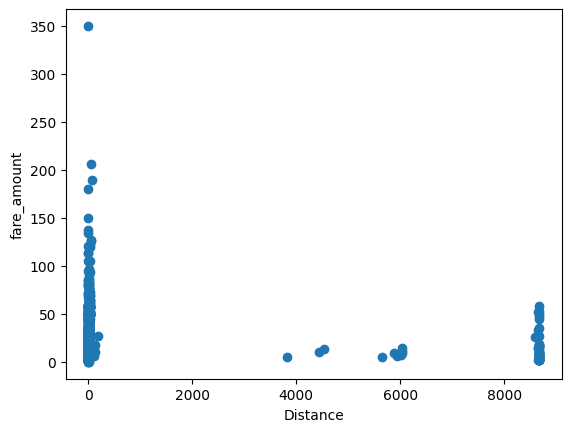

In [18]:
#Plotting a scatter plot to check for outliers.
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

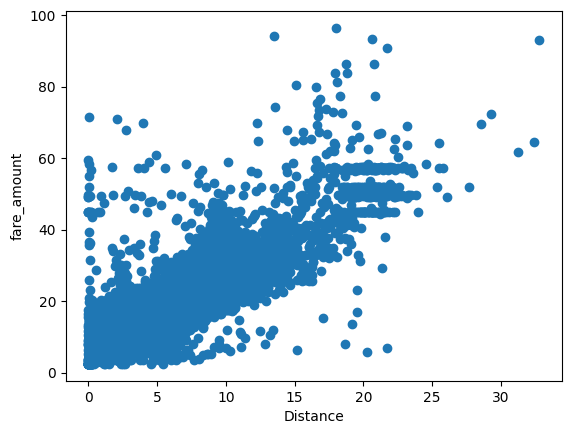

In [19]:
#Dealing with Outliers via removing rows with too large Distance and 0 or lesser distance.
df.drop(df[df['Distance']>60].index, inplace=True)
# print(df.drop(df[df['Distance']>60].index, inplace=True))
df.drop(df[df['Distance']==0].index, inplace=True)
df.drop(df[df['Distance']<0].index, inplace=True)
#Dealing with Outliers via removing rows with 0 or lesser fare amounts.
df.drop(df[df['fare_amount']==0].index, inplace=True)
df.drop(df[df['fare_amount']<0].index, inplace=True)
#Dealing with Outliers via removing rows with non-plausible fare amounts and distance travelled.
df.drop(df[df['Distance']>100].index, inplace=True)
df.drop(df[df['fare_amount']>100].index, inplace=True)
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )
#Plotting a Scatter Plot to check for any more outliers and also to show correlation between Fare Amount and Distance.
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [20]:
#Preprocessing the Data Using Standard Scaler in range of -1 to 1
x = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable
std = StandardScaler()
Y = std.fit_transform(y)
X = std.fit_transform(x)
#Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [21]:
def apply_model(model): #Model to print the metrics of the various prediction models
    model.fit(X_train,Y_train)
    print("Training score = ",model.score(X_train,Y_train))
    print("Testing score = ",model.score(X_test,Y_test))
    print("Accuracy = ",model.score(X_test,Y_test))
    Y_pred = model.predict(X_test)
    print("Predicted values:\n",Y_pred)
    print("Mean Absolute Error =", metrics.mean_absolute_error(Y_test, Y_pred))
    print("Mean Squared Error =", metrics.mean_squared_error(Y_test, Y_pred))
    print("Root Mean Squared Error =", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

In [22]:
lr = LinearRegression()
apply_model(lr)

Training score =  0.8032605021759467
Testing score =  0.8227338318277437
Accuracy =  0.8227338318277437
Predicted values:
 [[ 0.55433532]
 [ 0.26526744]
 [-0.55375822]
 ...
 [ 1.72074957]
 [ 0.21962514]
 [-0.39654586]]
Mean Absolute Error = 0.24491425863710978
Mean Squared Error = 0.18078492146922645
Root Mean Squared Error = 0.4251881012789827


In [23]:
#Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=10)
apply_model(rf)

<ipython-input-21-f386c7538fc6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


Training score =  0.8558165919300913
Testing score =  0.7886999308242845
Accuracy =  0.7886999308242845
Predicted values:
 [ 0.46966817  0.35336235 -0.59969776 ...  1.6722312   0.06547536
 -0.40322961]
Mean Absolute Error = 0.2628699354855849
Mean Squared Error = 0.21549439922034977
Root Mean Squared Error = 0.464213743032614
